In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

Problem 2

In [79]:
data = pd.read_csv('sgn.csv')
#data = data.astype(str)
#data = data.iloc[:, 0].str.extract(' ', expand=True)

In [83]:
def coefficients(m, model):
    sns.scatterplot(x=data['x'], y=data['y'])
    for i in range(1, m+1):
        data[f'sin{i}']=np.sin(data['x']*i)
        data[f'cos{i}']=np.cos(data['x']*i)
    X = data.iloc[:,2:]
    y = data['y']
    model.fit(X,y)
    print(model.coef_)
    print(model.intercept_)
    sns.lineplot(x=df['x'], y=model.predict(X), color = 'Green')

[1.26491679 0.00151386]
-0.004451120260183471


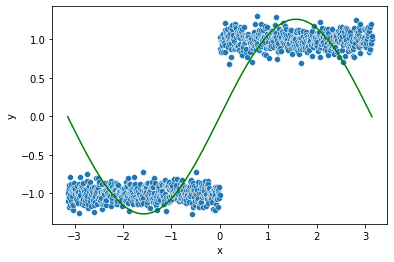

In [81]:
coefficients(1, LinearRegression())

[ 2.62664126e-04  1.21762323e-03  1.26491679e+00  1.52479113e-03
  4.25026998e-01 -6.29953476e-03 -3.80589168e-03 -3.55555065e-03
  2.57432965e-01 -1.51714195e-03]
-0.00445658807383976


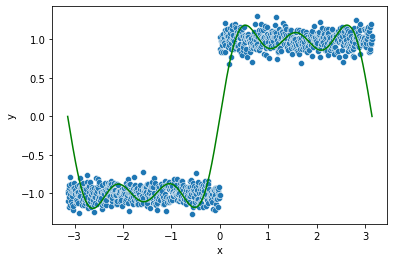

In [85]:
coefficients(5, LinearRegression())

[ 2.62664126e-04  1.21578403e-03  1.26491679e+00  1.52663033e-03
  4.25026998e-01 -6.29769556e-03 -3.80589168e-03 -3.55738985e-03
  2.57432965e-01 -1.51530275e-03  2.58057807e-03  5.57797926e-03
  1.89023306e-01 -3.13974590e-03 -1.67366696e-03 -3.12161190e-03
  1.40173314e-01 -2.09761782e-03  1.75548209e-03 -7.39087045e-03
  1.22313698e-01 -6.79173393e-03 -5.76361021e-03 -4.52414003e-03
  1.00734791e-01  2.24983005e-03 -5.63318179e-03 -2.60330039e-05
  8.44272410e-02  5.07302425e-04  6.99321870e-03 -3.57746705e-04
  7.45034555e-02  4.43675181e-03  2.73854030e-03 -1.79474500e-03
  7.41500351e-02 -4.08391886e-03  1.78243134e-03  3.64683060e-03]
-0.00445750767285147


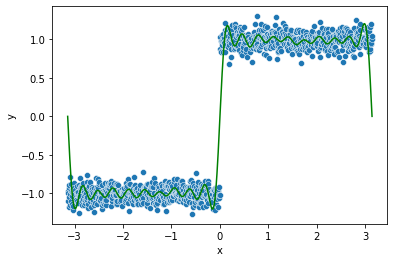

In [86]:
coefficients(20, LinearRegression())

[ 2.62664126e-04  1.16918397e-03  1.26491679e+00  1.57323039e-03
  4.25026998e-01 -6.25109551e-03 -3.80589168e-03 -3.60398991e-03
  2.57432965e-01 -1.46870270e-03  2.58057807e-03  5.53137921e-03
  1.89023306e-01 -3.09314584e-03 -1.67366696e-03 -3.16821196e-03
  1.40173314e-01 -2.05101777e-03  1.75548209e-03 -7.43747050e-03
  1.22313698e-01 -6.74513388e-03 -5.76361021e-03 -4.57074008e-03
  1.00734791e-01  2.29643010e-03 -5.63318179e-03 -7.26330584e-05
  8.44272410e-02  5.53902480e-04  6.99321870e-03 -4.04346759e-04
  7.45034555e-02  4.48335186e-03  2.73854030e-03 -1.84134505e-03
  7.41500351e-02 -4.03731881e-03  1.78243134e-03  3.60023054e-03
  5.97305614e-02 -3.68012029e-03 -7.33635872e-04  5.29226718e-03
  5.42002192e-02  3.42270945e-04  8.48652976e-04  2.58111551e-03
  5.38799453e-02 -5.22659628e-04 -5.41591004e-03 -6.24148511e-03
  4.78979239e-02 -2.43771021e-03 -7.44505683e-03  1.46995974e-03
  4.78178400e-02 -2.08563733e-03  3.11971358e-03 -6.97429416e-03
  3.65749796e-02 -3.37738

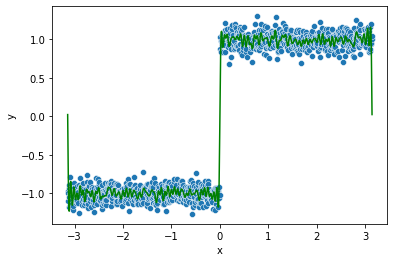

In [87]:
coefficients(100, LinearRegression())

[-2.40095549e+09  1.70369771e+07 -8.35004881e+08 ...  0.00000000e+00
 -8.14963311e+09 -2.16503627e+07]
-0.005711812394789774


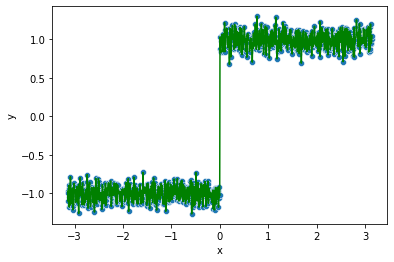

In [88]:
coefficients(1000, LinearRegression())

Problem 3

[ 0.00000000e+00  0.00000000e+00  1.16231549e+00 ...  0.00000000e+00
 -7.35436625e-14 -0.00000000e+00]
-0.004452634115688679


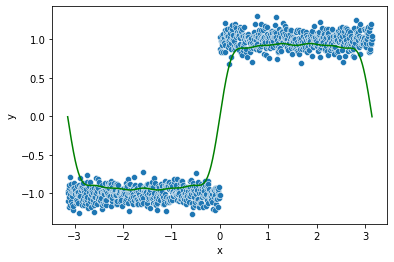

In [90]:
coefficients(1000, LassoCV())

Problem 4

In [10]:
df = pd.read_csv('BRCA_pam50.tsv', sep="\t", index_col=0)
df = df.loc[df['Subtype'].isin(['Luminal A', 'Luminal B'])]
X = df.iloc[:, :-1].to_numpy()
y = df['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
lin_svm1 = SVC(kernel="linear", C=0.01)
lin_svm1.fit(X_train, y_train)
y_pred = lin_svm1.predict(X_test)

Balanced accuracy score: 0.8652647975077882
TPR: 0.932 TNR: 0.761


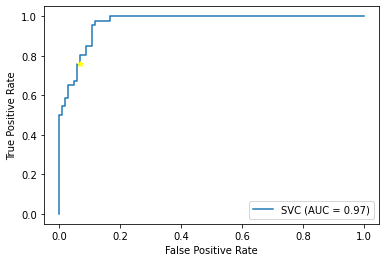

In [13]:
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(lin_svm1, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")
plt.show()

In [14]:
top2 = np.argsort(np.abs(lin_svm1.coef_[0]))[-2:]
X = df.iloc[:, top2].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=17
)
lin_svm1.fit(X_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Balanced accuracy score: 0.8316636308439587
TPR: 0.961 TNR: 0.5


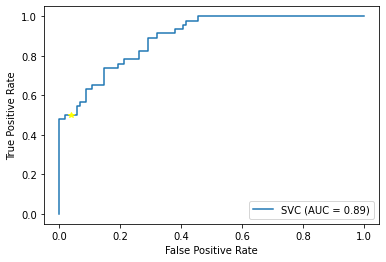

In [16]:
y_pred = lin_svm1.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(lin_svm1, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")
plt.show()

[[ 0.          0.          0.          0.          0.          0.
   0.27088147  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.36144728  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Balanced accuracy score: 0.7992673992673993
TPR: 0.777 TNR: 0.913


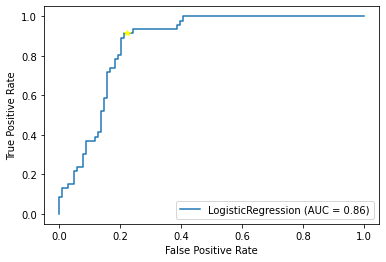

In [17]:
X = df.iloc[:, :-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=17
)

lr = LogisticRegression(class_weight = 'balanced', C=0.01, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print(lr.coef_)
y_pred = lr.predict(X_test)
print("Balanced accuracy score:", balanced_accuracy_score(y_pred, y_test))
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print("TPR:", round(TPR, 3), "TNR:", round(TNR, 3))

plot_roc_curve(lr, X_test, y_test)
plt.plot(1 - TPR, TNR, "*", c="yellow")
plt.show()

Problem 5

In [2]:
np.random.seed(17)
r=0
for m in range(10000):
  X = np.random.normal(loc=0, size=(20, 2))
  y = np.array([0]*10 + [1]*10)
  model = LogisticRegression(penalty='none')
  model.fit(X,y)
  y_pred = model.predict(X)
  if accuracy_score(y, y_pred) == 1:
    r += 1
print(r/10000)

0.0002
